## MCMC Parameter Estimation Examples

### Imports

In [ ]:
import numpy as np
from mcmc_estimator import MCMCParameterEstimator as mcmc

### Example 1: Quadratic Model
$$y(x)=a+bx+cx^2$$

In [3]:
np.random.seed(42)

# Test data
a_true, b_true, c_true = 2.0, -1.0, 0.5
N = 50
x_data = np.linspace(-3, 3, N)
y_true = a_true + b_true*x_data + c_true*(x_data**2)
y_data = y_true + np.random.normal(0, 1.0, size=N)

# Define model function
def quadratic_model(params, x):
    a, b, c = params
    return a + b*x + c*x**2

# MCMC Estimator
estimator = mcmc(
    model_fn=quadratic_model,
    x_data=x_data, y_data=y_data, initial_params=[0.0, 0.0, 0.0],
)
estimator.run()
estimator.summary()

Acceptance Rate = 0.261
Parameter Estimates:
Param 0: mean=1.584, std=0.210, 95% CI=(1.167, 2.008)
Param 1: mean=-1.099, std=0.081, 95% CI=(-1.250, -0.932)
Param 2: mean=0.561, std=0.050, 95% CI=(0.464, 0.658)


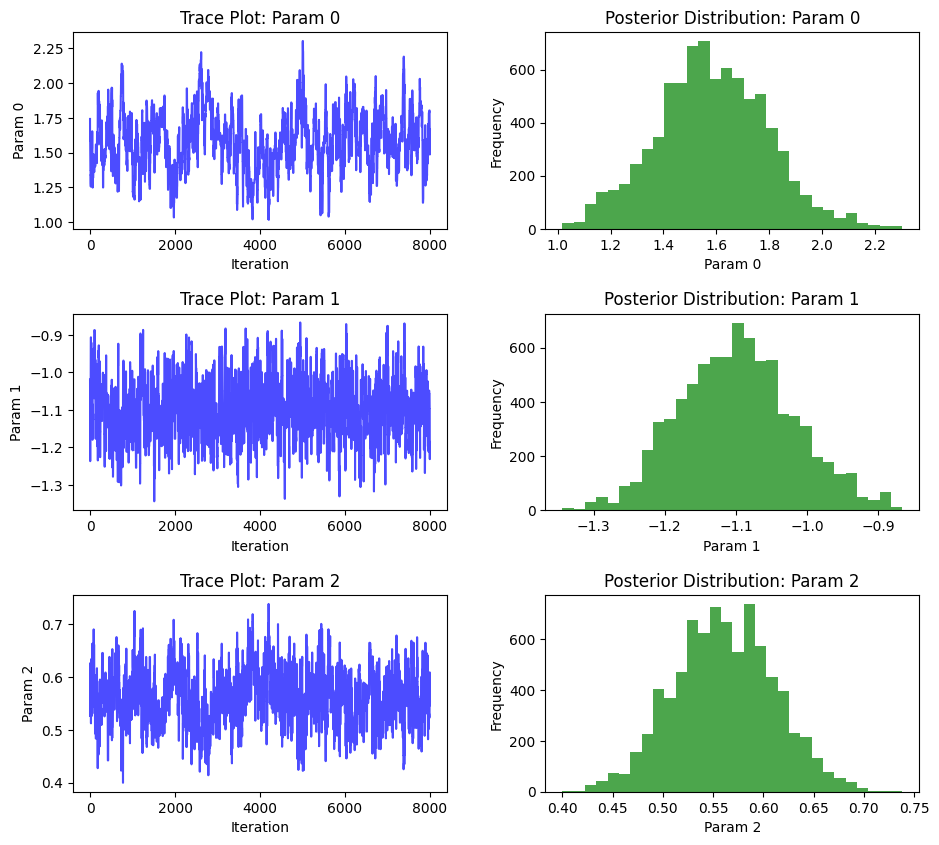

In [4]:
estimator.plot_diagnostics()

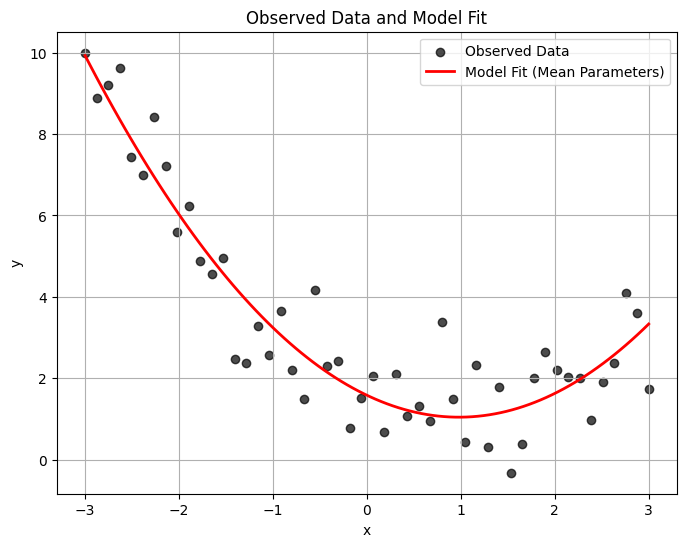

In [5]:
estimator.plot_fit()

### Example 2: Exponential Decay Model
$$y(x)=A \space exp(−kx)$$

In [6]:
np.random.seed(42)

# Test data
A_true = 5.0
k_true = 0.5
sigma_true = 0.3
x_data = np.linspace(0, 5, 50)
y_true = A_true * np.exp(-k_true * x_data)
y_data = y_true + np.random.normal(0, sigma_true, size=len(x_data))

# Define model function
def exp_decay_model(params, x):
    A, k = params
    return A * np.exp(-k*x)

# MCMC Estimator
estimator_2 = mcmc(
    model_fn=exp_decay_model,
    x_data=x_data,
    y_data=y_data,
    initial_params=[1.0, 1.0],  # initial guess
    step_size=[0.1, 0.1],      # separate step sizes for A, k
    n_iterations=15000,
    burn_in=0.3,
    sigma_obs=sigma_true,
    random_seed=42
)
estimator_2.run()
estimator_2.summary()

Acceptance Rate = 0.170
Parameter Estimates:
Param 0: mean=5.246, std=0.141, 95% CI=(4.972, 5.520)
Param 1: mean=0.558, std=0.022, 95% CI=(0.516, 0.605)


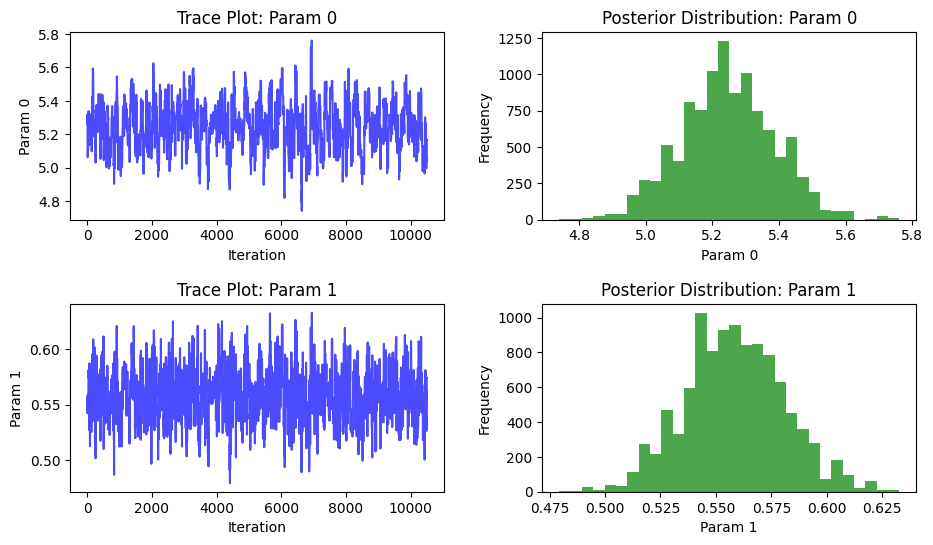

In [7]:
estimator_2.plot_diagnostics()

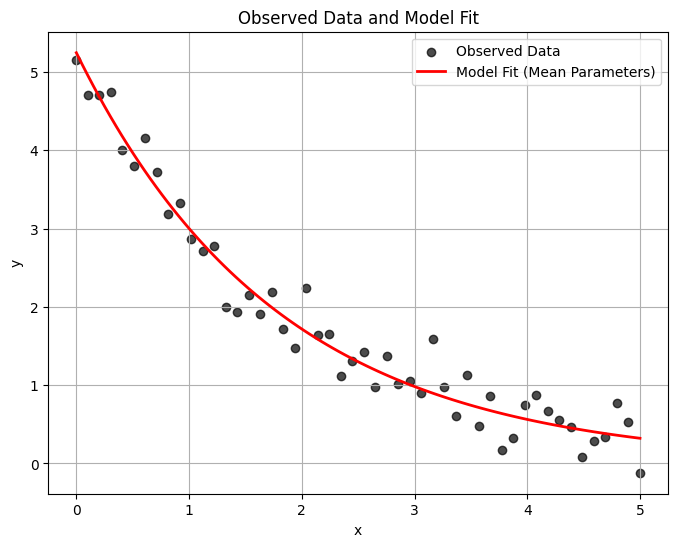

In [8]:
estimator_2.plot_fit()

### Example 3: Damped Oscillation
$$y(x)=A⋅e^{−kx}⋅cos(ωx+ϕ)$$

In [9]:
np.random.seed(42)

# Test data
A_true = 3.0      # Amplitude
k_true = 0.5      # Decay rate
omega_true = 2.0  # Angular frequency
phi_true = 0.5    # Phase offset
sigma_true = 0.3  # Noise level
np.random.seed(42)
x_data = np.linspace(0, 10, 100)  # x spans 0 to 10
y_true = A_true * np.exp(-k_true * x_data) * np.cos(omega_true * x_data + phi_true)
y_data = y_true + np.random.normal(0, sigma_true, size=len(x_data))

# Define model function
def damped_oscillation(params, x):
    A, k, omega, phi = params
    return A * np.exp(-k * x) * np.cos(omega * x + phi)

# MCMC Estimator
estimator_3 = mcmc(
    model_fn=damped_oscillation,
    x_data=x_data,
    y_data=y_data,
    initial_params=[1.0, 1.0, 1.0, 0.0],  # Initial guess for A, k, omega, phi
    step_size=[0.2, 0.05, 0.1, 0.1],      # Step sizes tuned for different scales
    n_iterations=30000,
    burn_in=0.3,
    sigma_obs=sigma_true,
    random_seed=42
)
estimator_3.run()
estimator_3.summary()

Acceptance Rate = 0.113
Parameter Estimates:
Param 0: mean=3.157, std=0.211, 95% CI=(2.770, 3.606)
Param 1: mean=0.491, std=0.042, 95% CI=(0.417, 0.580)
Param 2: mean=2.002, std=0.044, 95% CI=(1.914, 2.087)
Param 3: mean=0.443, std=0.060, 95% CI=(0.323, 0.560)


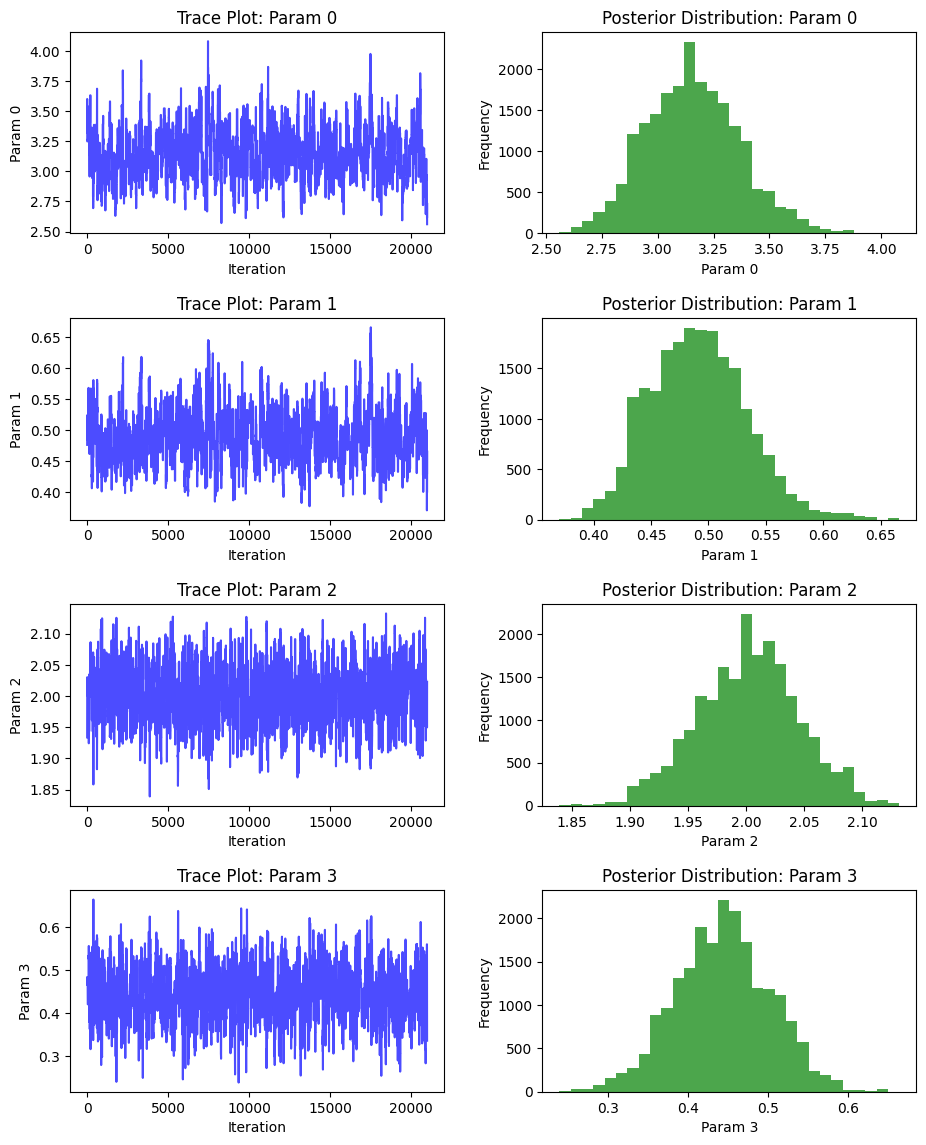

In [10]:
estimator_3.plot_diagnostics()

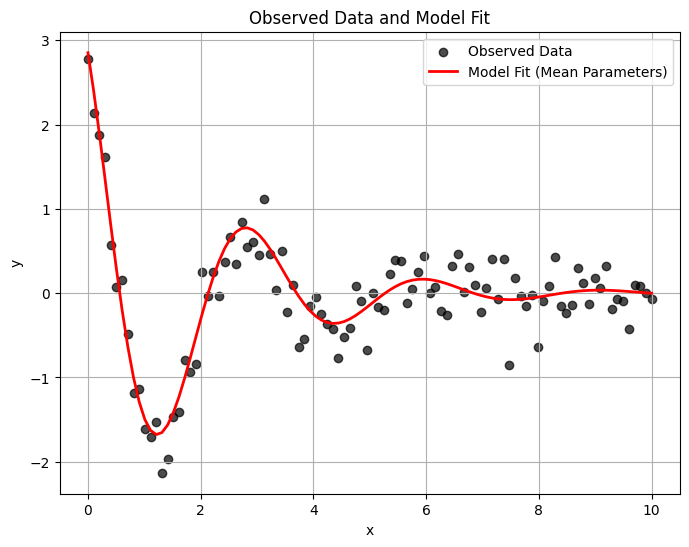

In [11]:
estimator_3.plot_fit()

In [14]:
# Access the parameter samples and calculate the means
samples_3 = estimator_3.get_samples()
print(samples_3.mean(axis=0))

[3.15697316 0.49097106 2.00200042 0.44327931]
